In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
iteracion = int(input("Numero de iteraciones: "))
peso_ini=int(input('Introduzca el peso inicial:'))
alpha = float(input("Introduce el valor de alpha: "))




In [3]:
datos = pd.read_csv('casas.csv')
datos.head()


,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99


In [4]:
X = datos.drop(['Precio (MDP)'],axis=1).values
y = datos['Precio (MDP)'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)

In [5]:
def iter_pesos(X_train: np.ndarray, y_train: np.ndarray, alpha: float, iteracion: int, peso_ini: int):
    pesos=[]
    for i in range(iteracion):
        sum=0
        for x, y in zip(X_train,y_train):
            aux=(peso_ini*x-y)*x
            sum+=aux
        #print("peso: "+ str(peso_ini)+" alpha: "+str(alpha)+" X: "+str(x)+' Y: '+str(y) + ' aux: '+str(aux)+ ' sum: ' + str(sum))
        peso_ini = peso_ini-2*alpha*sum
        pesos.append(peso_ini[0])
    return pesos

In [6]:

pesos = iter_pesos(X_train=X_train,y_train=y_train,alpha=alpha,iteracion=iteracion,peso_ini=peso_ini)
    

In [7]:

def pred(pesos: np.ndarray, X_test: np.ndarray):
    all_preds = []
    for i in range(len(pesos)):
        preds2 = np.array([])
        for j in range(X_test.shape[0]):
            pred_value = X_test[j] * pesos[i]
            preds2 = np.append(preds2, pred_value)
        all_preds.append(preds2) 
    return np.array(all_preds)  

predic = pred(pesos, X_test)
print("predic:", predic)


predic: [[0.31027985 0.57658302 0.35099899]
 [0.51074827 0.94910703 0.57777561]
 [0.64026874 1.18979073 0.72429351]
 [0.7239505  1.34529384 0.81895713]]


In [8]:
def error_estim(predic: np.ndarray, y_test: np.ndarray):
    errors = np.array([]) 
    for inner_array in predic:
        inner_errors = np.sum(np.abs(inner_array - y_test))
        errors = np.append(errors, inner_errors)
    return errors

error= error_estim(predic,y_test)
error

array([2.26213814, 1.46236909, 0.94564702, 0.61179853])

In [9]:
def recta(m,x):
    return m*x

def salida(pesos: np.ndarray, y_test:np.ndarray, predic: np.ndarray,error: np.ndarray):
    for i in range(len(pesos)):
        print("Iteración "+ str(i)+": "+str(pesos[i]))
    print("\n----------------------Y_TEST----------------------")
    print(y_test)
    
    print("\n----------------------Y_PRED----------------------")
    for i in range(len(predic)):
        print("Iteracion "+ str(i)+": "+ str(predic[i]))

    print("\n----------------------Error de estimación----------------------")
    for i in range(len(error)):
        print("Iteracion "+ str(i)+": "+ str(error[i]))
    print("\n----------------------Gráficas----------------------")

    plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
    for i in range(iteracion):
        plt.plot(X_test, predic[i], label=f'Iteración {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Predicciones en cada iteración')
    plt.legend()
    plt.show()

    iter=[]
    for i in range(len(error)):
        iter.append(i)
    colores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
 
    plt.scatter(x=iter, y=error, c=colores[:len(error)])
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.show()

   

        


Iteración 0: 0.0008143827999999999
Iteración 1: 0.00134054665030748
Iteración 2: 0.0016804953788051745
Iteración 3: 0.0019001325468463942

----------------------Y_TEST----------------------
[0.88 1.63 0.99]

----------------------Y_PRED----------------------
Iteracion 0: [0.31027985 0.57658302 0.35099899]
Iteracion 1: [0.51074827 0.94910703 0.57777561]
Iteracion 2: [0.64026874 1.18979073 0.72429351]
Iteracion 3: [0.7239505  1.34529384 0.81895713]

----------------------Error de estimación----------------------
Iteracion 0: 2.262138144
Iteracion 1: 1.4623690915326304
Iteracion 2: 0.9456470242161347
Iteracion 3: 0.6117985287934806

----------------------Gráficas----------------------


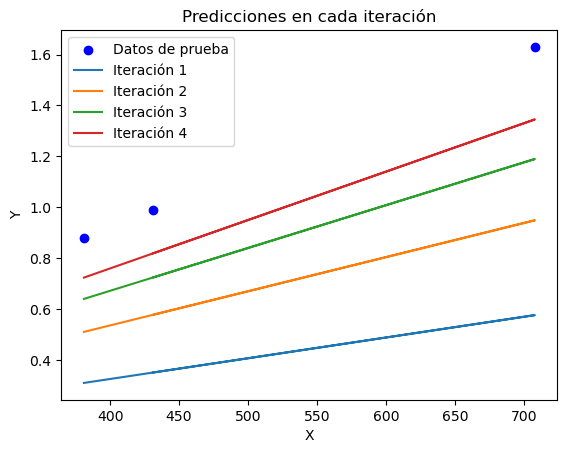

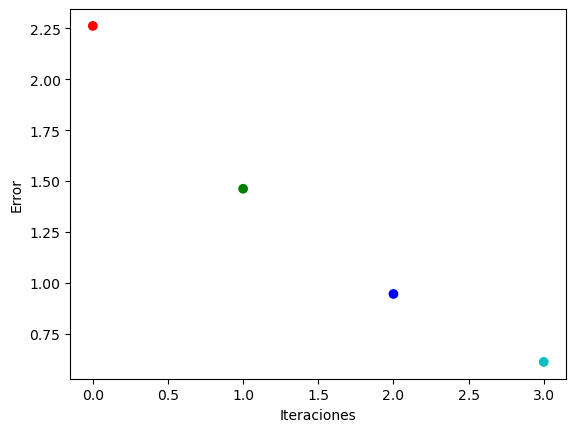

In [10]:

salida(pesos,y_test,predic,error)